In [1]:
# imports and configs
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

array([ 0.        ,  0.02040816,  0.04081633,  0.06122449,  0.08163265,
        0.10204082,  0.12244898,  0.14285714,  0.16326531,  0.18367347,
        0.20408163,  0.2244898 ,  0.24489796,  0.26530612,  0.28571429,
        0.30612245,  0.32653061,  0.34693878,  0.36734694,  0.3877551 ,
        0.40816327,  0.42857143,  0.44897959,  0.46938776,  0.48979592,
        0.51020408,  0.53061224,  0.55102041,  0.57142857,  0.59183673,
        0.6122449 ,  0.63265306,  0.65306122,  0.67346939,  0.69387755,
        0.71428571,  0.73469388,  0.75510204,  0.7755102 ,  0.79591837,
        0.81632653,  0.83673469,  0.85714286,  0.87755102,  0.89795918,
        0.91836735,  0.93877551,  0.95918367,  0.97959184,  1.        ])

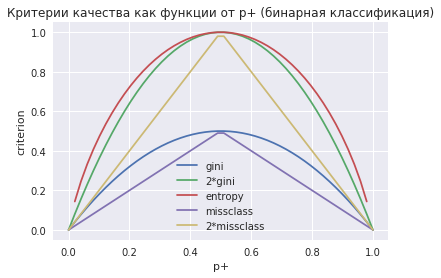

In [3]:
plt.rcParams['figure.figsize'] = (6,4)

xx = np.linspace(0, 1, 50)  # Similar to arange, but uses a number of samples (instead of the step size).
plt.plot(xx, [2 * x * (1-x) for x in xx], label='gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label='missclass')
plt.plot(xx, [2 - 2 * max(x, 1-x) for x in xx], label='2*missclass')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Критерии качества как функции от p+ (бинарная классификация)')
plt.legend();
xx

In [9]:
# первый класс
np.seed = 7
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
# в итоге до половины матрица 100х2 с нулём в качестве среднего, а от половины среднее - 2

train_labels = np.r_[train_labels, np.ones(100)]
# array с нолями до половины, а потом - единицы
# в итоге у нас данные со средним значением 0 - им соответствует класс "0"
#                 и со средним значением 2 - им соответствует класс "1"

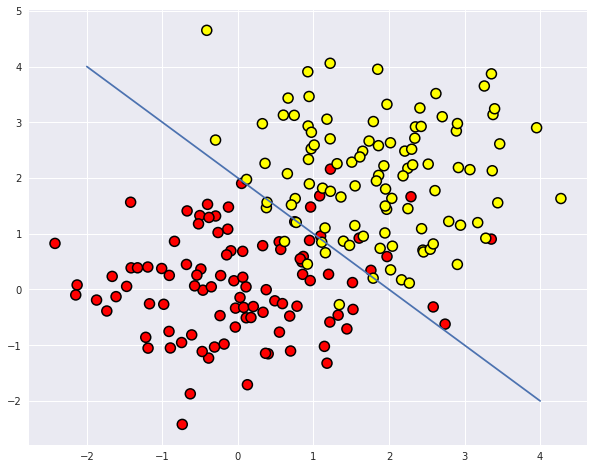

In [10]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(
    train_data[:, 0], 
    train_data[:, 1], 
    c=train_labels, 
    s=100, 
    cmap='autumn', 
    edgecolors='black', 
    linewidth=1.5
);
plt.plot(range(-2,5), range(4,-3,-1));

array([[ -3.44653286e-02,  -6.74117763e-01],
       [ -2.28419855e-01,   2.49644037e-01],
       [ -5.04023840e-01,   1.32599611e+00],
       [  1.10139972e-01,  -5.07979510e-01],
       [ -2.36881632e-01,  -4.69288449e-01],
       [  8.56441385e-01,   2.71451135e-01],
       [ -4.62913618e-01,  -1.24705098e-02],
       [ -1.41369119e+00,   3.88150034e-01],
       [ -1.00890570e+00,   3.76415643e-01],
       [  4.88335909e-01,  -2.03381329e-01],
       [  1.19943150e+00,   2.72121974e-01],
       [ -2.12811793e+00,   8.10166221e-02],
       [ -9.34254738e-02,   6.94311725e-01],
       [  1.09456390e+00,   9.59576285e-01],
       [ -6.30206585e-01,  -1.87194142e+00],
       [  7.81657485e-01,  -3.00001122e-01],
       [  6.96862193e-01,  -1.10383709e+00],
       [  1.21663812e+00,  -5.84544438e-01],
       [ -9.08086281e-01,   2.52708927e-01],
       [  3.32388575e-01,  -4.08865205e-01],
       [  6.85442095e-01,  -4.77251526e-01],
       [  5.49466760e-01,  -7.65323724e-01],
       [ -

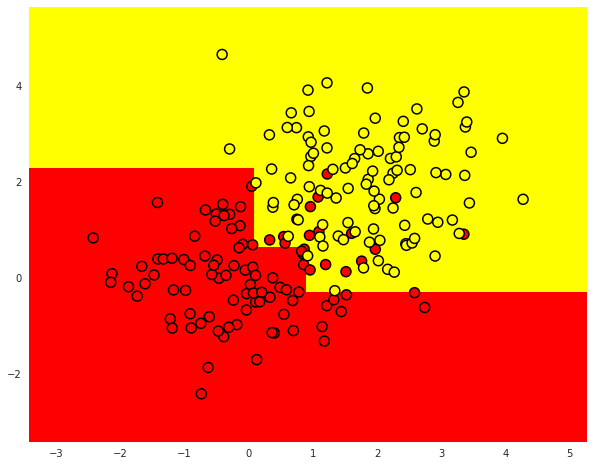

In [56]:
from sklearn.tree import DecisionTreeClassifier

# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data, eps=0.01):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, eps))

# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# обучаем дерево
clf_tree.fit(train_data, train_labels)

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# .ravel() - make one dimentional vector from a matrix

plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(
    train_data[:, 0], 
    train_data[:, 1], 
    c=train_labels, 
    s=100, 
    cmap='autumn', 
    edgecolors='black', 
    linewidth=1.5
);
train_data

In [20]:
# pip install pydot
#from sklearn.tree import export_graphviz
#export_graphviz(clf_tree, out_file='./clf_tree.dot', filled=True)
#!dot -Tpng './clf_tree.dot' -o './clf_tree.png'

/bin/sh: 1: dot: not found


In [ ]:
# learn tree and draw it

#age_tree = DecisionTreeClassifier(random_state=17)
#age_tree.fit(data['Возраст'].values.reshape(-1, 1), data['Невозврат кредита'].values)

# export_graphviz(age_tree, feature_names=['Возраст'], out_file='../../img/age_tree.dot', filled=True)
# !dot -Tpng '../../img/age_tree.dot' -o '../../img/age_tree.png'

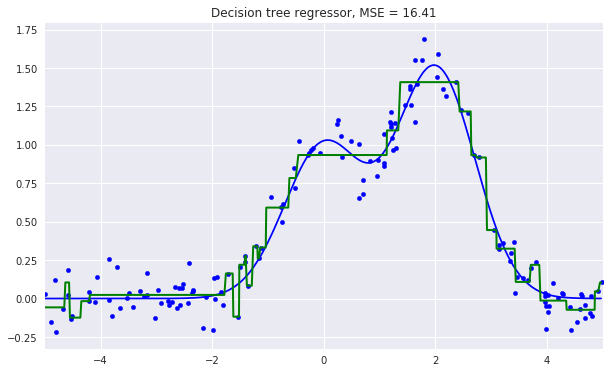

In [22]:
# desicion tree for regression

n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

In [24]:
df = pd.read_csv('../../data/telecom_churn.csv')

df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df['State']
y = df['Churn']
df.drop(['State', 'Churn'], axis=1, inplace=True)

df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [25]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# split data to train and test sets
X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3, random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)  # init decision tree
knn = KNeighborsClassifier(n_neighbors=10)                   # init closest neighbors models

tree.fit(X_train, y_train)  # train decision tree
knn.fit(X_train, y_train)   # train closest neighbors models

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [26]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred)  # decision tree accuracy

0.93999999999999995

In [27]:
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred)  # closest neighbors accuracy

0.88100000000000001

In [28]:
# lets find the best params for decesion tree:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True) # cv - a count of cross validation steps

tree_grid.fit(X_train, y_train)

tree_grid.best_params_, tree_grid.best_score_

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    4.5s finished


({'max_depth': 6, 'max_features': 17}, 0.94256322331761677)

In [29]:
# new accuracy score for decision tree with better params
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.94599999999999995

In [30]:
# lets tune params for closest neighbors algorithms
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    7.1s finished


({'knn__n_neighbors': 7}, 0.88598371195885128)

In [31]:
# new accuracy score for closest neighbors (knn) with better params
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

0.89000000000000001

# Random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5))) # 0.949

0.949423311981


In [33]:
# find better params for random forest
forest_params = {
    'max_depth': range(1,11),
    'max_features': range(4,19)
}

forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(X_train, y_train)

forest_grid.best_params_, forest_grid.best_score_ # ({'max_depth': 9, 'max_features': 6}, 0.951)

accuracy_score(y_holdout, forest_grid.predict(X_holdout)) # 0.953

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  7.4min finished


0.95299999999999996

# not the best example for decision tree:

it's two simple classes easily devided by one line. But trees solution looks really complex

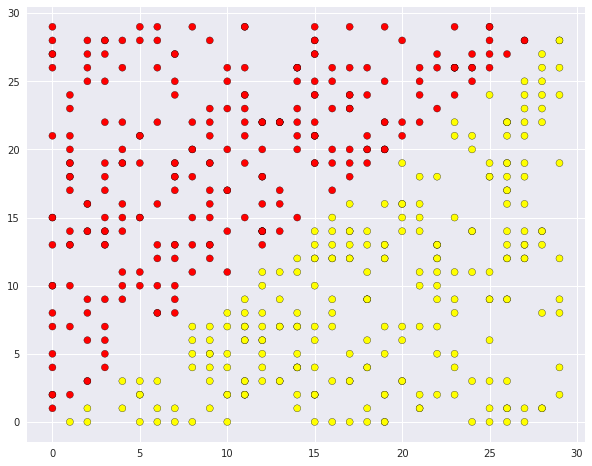

In [34]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1, x2 = np.random.randint(x1_min, x1_max), np.random.randint(x2_min, x2_max)

        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)

X, y = form_linearly_separable_data()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black');

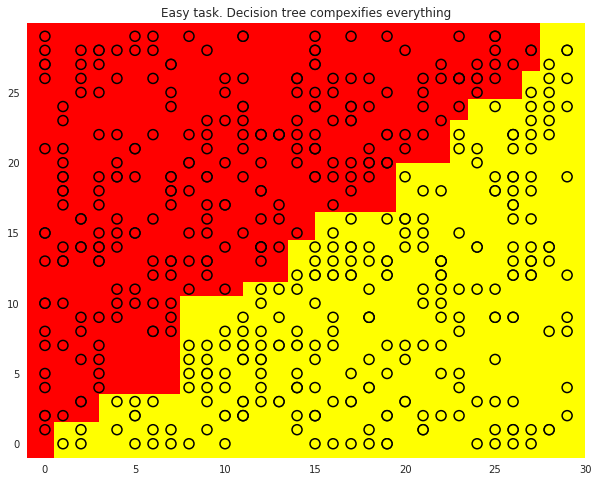

In [37]:
# lets build a tree
tree = DecisionTreeClassifier(random_state=17).fit(X, y)

xx, yy = get_grid(X, eps=.05)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='autumn', edgecolors='black', linewidth=1.5)
plt.title('Easy task. Decision tree compexifies everything');

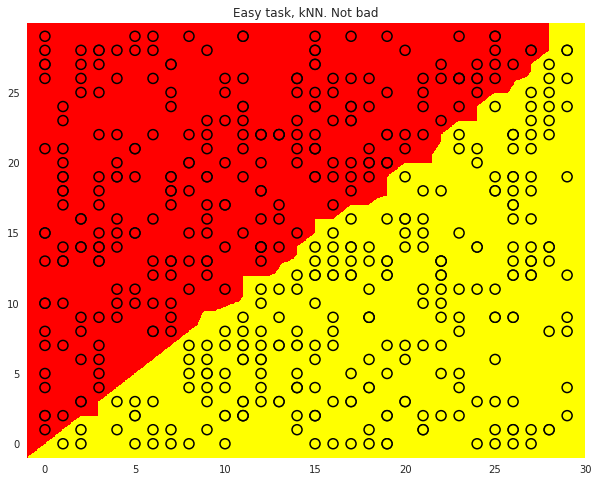

In [38]:
# lets try closest neighbor method (knn) for the example above
knn = KNeighborsClassifier(n_neighbors=1).fit(X, y)

xx, yy = get_grid(X, eps=.05)
predicted = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.title('Easy task, kNN. Not bad');

# Closest neighbors algorithm for hand-written numbers recognizing

In [41]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0,:].reshape([8,8])  # show one data example

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

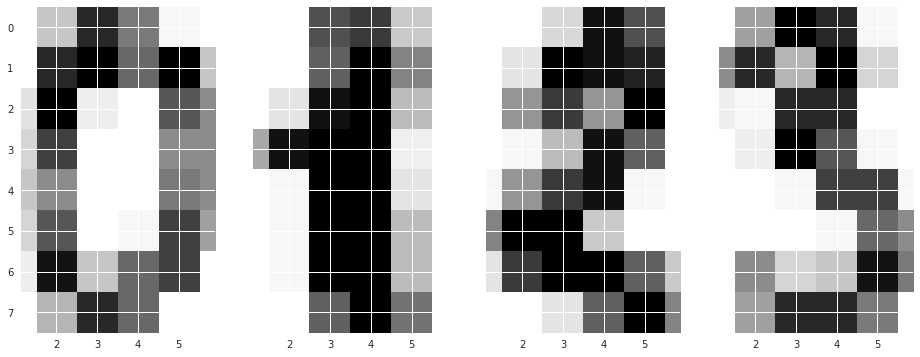

In [43]:
# plot some data examples
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
    axes[i].imshow(X[i,:].reshape([8,8]));

In [44]:
# split dataset to training and test ones
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)

In [46]:
# train knn and tree
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train);

In [47]:
# accuracy results
tree_pred = tree.predict(X_holdout)
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred), accuracy_score(y_holdout, tree_pred)

(0.97407407407407409, 0.66666666666666663)

In [48]:
# tune tree params
tree_params = {
    'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
    'max_features': [1, 2, 3, 5, 10, 20 ,30, 50, 64]
}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)
tree_grid.best_params_, tree_grid.best_score_

Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed:    2.0s finished


({'max_depth': 20, 'max_features': 64}, 0.84407319013524262)

In [49]:
# knn accurasy score for neighbor=1 param 
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5))

0.98654584223971487

In [50]:
# random forest (RF) for same task:
np.mean(cross_val_score(RandomForestClassifier(random_state=17), X_train, y_train, cv=5)) # 0.935

0.93490856191104044

# Not so good task for KNN

In [51]:
# generate data by some functin but with noise
def form_noisy_data(n_obj=1000, n_feat=100, random_seed=17):
    np.seed = random_seed
    y = np.random.choice([-1, 1], size=n_obj)

    # первый признак пропорционален целевому
    x1 = 0.3 * y

    # остальные признаки – шум

    x_other = np.random.random(size=[n_obj, n_feat - 1])

    return np.hstack([x1.reshape([n_obj, 1]), x_other]), y

X, y = form_noisy_data()

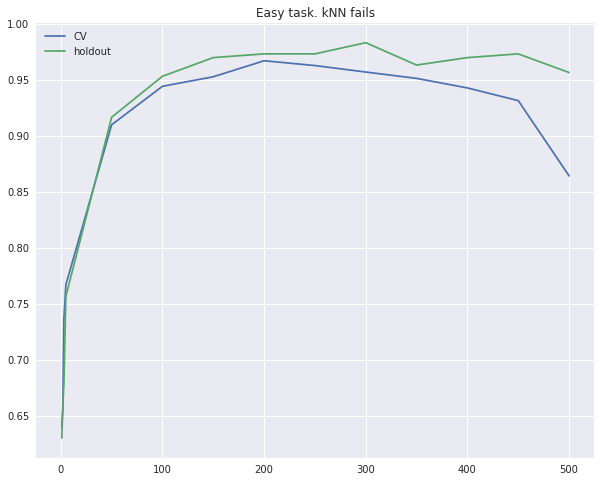

In [53]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)

from sklearn.model_selection import cross_val_score

cv_scores, holdout_scores = [], []
n_neighb = [1, 2, 3, 5] + list(range(50, 550, 50))

for k in n_neighb:
    knn = KNeighborsClassifier(n_neighbors=k)

    cv_scores.append(np.mean(cross_val_score(knn, X_train, y_train, cv=5)))
    knn.fit(X_train, y_train)
    holdout_scores.append(accuracy_score(y_holdout, knn.predict(X_holdout)))

plt.plot(n_neighb, cv_scores, label='CV')
plt.plot(n_neighb, holdout_scores, label='holdout')
plt.title('Easy task. kNN fails')
plt.legend();

In [54]:
# same task for tree
tree = DecisionTreeClassifier(random_state=17, max_depth=1)
tree_cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=5))
tree.fit(X_train, y_train)
tree_holdout_score = accuracy_score(y_holdout, tree.predict(X_holdout))
print('Decision tree. CV: {}, holdout: {}'.format(tree_cv_score, tree_holdout_score))

Decision tree. CV: 1.0, holdout: 1.0
